In [56]:
# import modules
import panel as pn
pn.extension('tabulator')
import pandas as pd
import numpy as np
from panel.template import FastListTemplate
from pathlib import Path
from yahoo_fin.stock_info import get_data
import datetime
from matplotlib.figure import Figure
from matplotlib import cm
%matplotlib inline
import hvplot.pandas
# import holoviews as hv
# from holoviews import opts

# import modules that help build tabs
import modules.helpers as helpers
import modules.HistoricalData as hst
import modules.MCTab as MCTab
import modules.intro as intro
import modules.profile as prf
import modules.algorithmic_functions as af

import pandas_ta as ta
import yfinance as yf


In [57]:
def create_portfolio_performance_data(df, signal, initial_capital, share_size):
    
 
    df['Position'] = share_size * df[signal]

    # Determine the points in time where shares are bought or sold
    signals_df['Entry/Exit Position'] = signals_df['Position'].diff()
    if df.loc[df.index[0],'Position'] == 500:
        df.loc[df.index[0],'Entry/Exit Position'] = 500
    else:
        df.loc[df.index[0],'Entry/Exit Position'] = 0

    # Multiply the close price by the number of shares held, or the Position
    df['Portfolio Holdings'] = df['close'] * df['Position']

    # Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
    df['Portfolio Cash'] = initial_capital - (df['close'] * df['Entry/Exit Position']).cumsum()

    # Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
    df['Portfolio Total'] = df['Portfolio Cash'] + df['Portfolio Holdings']

    # Calculate the portfolio daily returns
    df['Portfolio Daily Returns'] = df['Portfolio Total'].pct_change()

    # Calculate the portfolio cumulative returns
    df['Portfolio Cumulative Returns'] = (1 + df['Portfolio Daily Returns']).cumprod() - 1

    # return dataframe
    return df

In [58]:
market_data = pd.read_csv(Path(f"./data/at_market_data.csv"),
                 index_col='index', parse_dates=True, infer_datetime_format=True)
performance_data = pd.read_csv(Path(f"./data/performance/performance_data_sma_aggressive.csv"),
                 index_col='index', parse_dates=True, infer_datetime_format=True)

In [59]:
performance_data['daily_return'] = performance_data['close'].pct_change()

In [60]:
performance_data['cum_returns'] = (1 + performance_data['daily_return']).cumprod() - 1

In [61]:
performance_data.head()


,close,SMA_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,daily_return,cum_returns
index,,,,,,,,,,,
2022-01-10,131.489505,1,700,700.0,92042.653437,57957.346563,150000.000000,NaN,NaN,NaN,NaN
2022-01-11,133.128998,1,700,0.0,93190.298529,57957.346563,151147.645092,0.007651,0.007651,0.012469,0.012469
2022-01-12,133.885004,1,700,0.0,93719.502697,57957.346563,151676.849260,0.003501,0.011179,0.005679,0.018218
2022-01-13,130.567496,1,700,0.0,91397.247543,57957.346563,149354.594107,-0.015311,-0.004303,-0.024779,-0.007012
2022-01-14,131.578996,1,700,0.0,92105.297327,57957.346563,150062.643890,0.004741,0.000418,0.007747,0.000681


In [47]:
(176570 - 150000) / 150000 * 100

17.713333333333335

In [62]:
def make_test_plot():
    text = 'strategy'
    fig0 = Figure(figsize=(16,8))
    ax = fig0.subplots()
    #ax = port_cum_returns.plot(figsize=(10,5), title="Cumulative Returns of Conservative Portfolio vs S&P 500")
    #gmarket_cum_returns.plot(ax=ax)
    chart = ax.plot(performance_data['Portfolio Cumulative Returns'])
    ax.plot(market_data['market_cum_returns'])
    ax.plot(performance_data['cum_returns'])
    ax.set_title("Compare All Three")
    ax.legend([text,
     'S&P','no strategy'])
    return fig0

In [63]:
fig = make_test_plot()

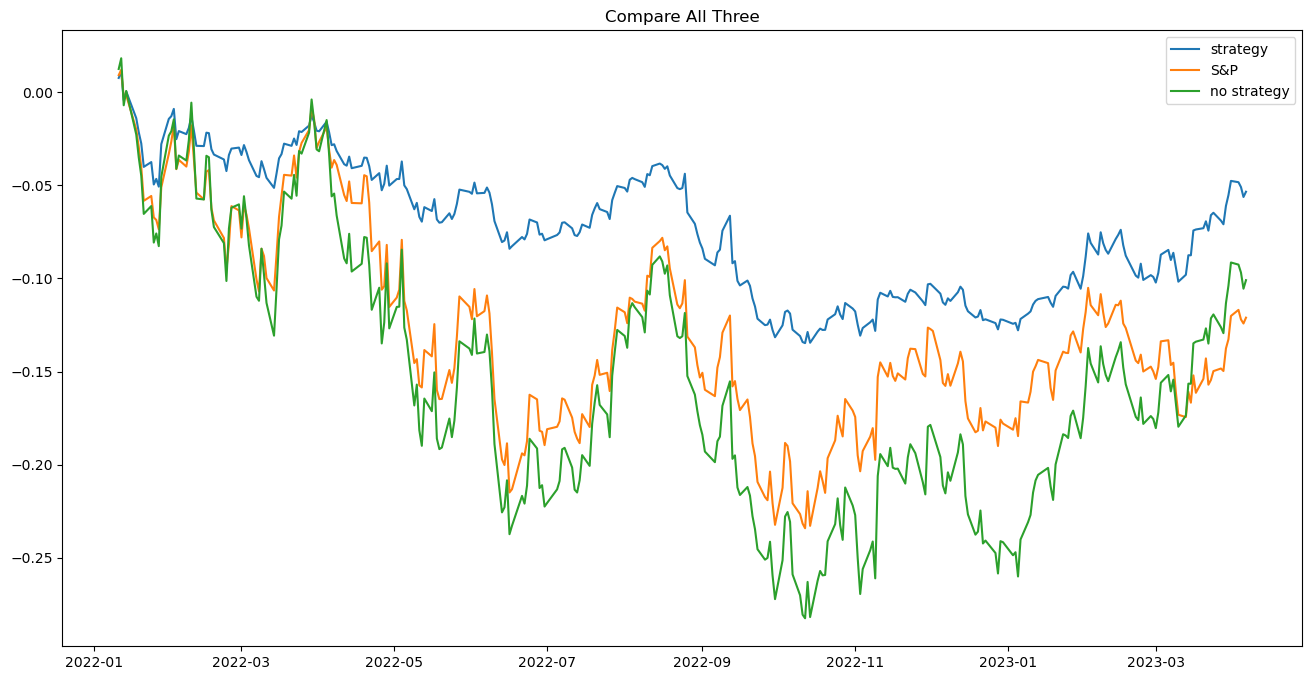

In [64]:
fig

In [ ]:
def create_portfolio_performance_data(df, signal, initial_capital=default_initial_investment, share_size=500):
    
 
    df['Position'] = (share_size * df[signal]) + share_size


    # Determine the points in time where shares are bought or sold
    df['Entry/Exit Position'] = df['Position'].diff()
    df.loc[df.index[0],'Entry/Exit Position'] = df.loc[df.index[0],'Position']

    # Multiply the close price by the number of shares held, or the Position
    df['Portfolio Holdings'] = df['close'] * df['Position']

    # Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
    df['Portfolio Cash'] = initial_capital - (df['close'] * df['Entry/Exit Position']).cumsum()

    # Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
    df['Portfolio Total'] = df['Portfolio Cash'] + df['Portfolio Holdings']

    # Calculate the portfolio daily returns
    df['Portfolio Daily Returns'] = df['Portfolio Total'].pct_change()

    # Calculate the portfolio cumulative returns
    df['Portfolio Cumulative Returns'] = (1 + df['Portfolio Daily Returns']).cumprod() - 1

    # return dataframe
    return df

In [54]:
performance_data.head(25)

,close,SMA_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,daily_return,cum_returns
index,,,,,,,,,,,
2022-01-10,131.489505,1,700,0.0,92042.653437,99764.327067,191806.980504,-0.000269,0.278713,NaN,NaN
2022-01-11,133.128998,1,700,0.0,93190.298529,99764.327067,192954.625596,0.005983,0.286364,0.012469,0.012469
2022-01-12,133.885004,1,700,0.0,93719.502697,99764.327067,193483.829764,0.002743,0.289892,0.005679,0.018218
2022-01-13,130.567496,1,700,0.0,91397.247543,99764.327067,191161.574610,-0.012002,0.274410,-0.024779,-0.007012
2022-01-14,131.578996,1,700,0.0,92105.297327,99764.327067,191869.624394,0.003704,0.279131,0.007747,0.000681
2022-01-18,128.503999,1,700,0.0,89952.799530,99764.327067,189717.126597,-0.011219,0.264781,-0.023370,-0.022705
2022-01-19,126.887503,1,700,0.0,88821.252270,99764.327067,188585.579337,-0.005964,0.257237,-0.012579,-0.034999
2022-01-20,125.595505,1,700,0.0,87916.853466,99764.327067,187681.180533,-0.004796,0.251208,-0.010182,-0.044825
2022-01-21,122.899501,1,700,0.0,86029.650860,99764.327067,185793.977927,-0.010055,0.238627,-0.021466,-0.065328


In [55]:
performance_data.loc[performance_data.index[0], 'Position']

700